Lab: Maximum Likelihood estimation (MLE)
----

-----
Part I: Estimating to Emperical Data
-----

How tall does your garden grow?
-----

![](http://www.weedist.com/wp-content/uploads/2012/08/natural-plants-225x300.jpg)

Your "gardener" friend wants your help do some data analysis. He pays cash only!

The file `plants.csv` contains heights to 1,000 plants. 

You are told that year-to-year the plant's heights resemble a normal distribution with a standard deviation of 3cm.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline


1) Read in `../data/plant.csv`
   

In [2]:
plants = pd.read_csv('../data/plant.csv')

2) Plot the data on a histogram and set normed=True to get the probability density histogram.


Explore bins size. What is a useful number of bins?

In [3]:
plants.describe()

,0
count,1000.000000
mean,40.017209
std,2.873319
min,32.022567
25%,38.087044
50%,40.086478
75%,41.942700
max,48.214524


(array([ 0.00988145,  0.02099808,  0.05373038,  0.09634413,  0.13031161,
         0.13401716,  0.09510895,  0.04940725,  0.0197629 ,  0.00802868]),
 array([ 32.02256694,  33.64176262,  35.2609583 ,  36.88015398,
         38.49934966,  40.11854535,  41.73774103,  43.35693671,
         44.97613239,  46.59532807,  48.21452375]),
 <a list of 10 Patch objects>)

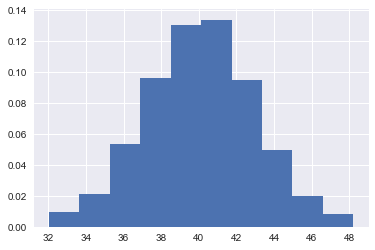

In [4]:
plt.hist(plants['0'],label='plant height',normed=True,bins=10)

(array([ 0.01543976,  0.07503726,  0.13216438,  0.0722581 ,  0.01389579]),
 array([ 32.02256694,  35.2609583 ,  38.49934966,  41.73774103,
         44.97613239,  48.21452375]),
 <a list of 5 Patch objects>)

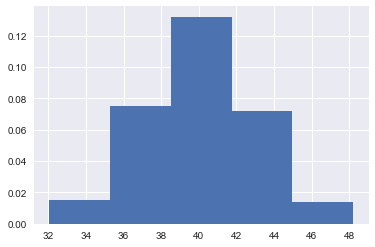

In [5]:
plt.hist(plants['0'],label='plant height',normed=True,bins=5)

(array([ 0.0129694 ,  0.00833747,  0.02501242,  0.04261375,  0.0787428 ,
         0.10375522,  0.13339957,  0.13617872,  0.12691486,  0.11023992,
         0.06392063,  0.04261375,  0.02408603,  0.01389579,  0.00370554]),
 array([ 32.02256694,  33.10203073,  34.18149452,  35.2609583 ,
         36.34042209,  37.41988588,  38.49934966,  39.57881345,
         40.65827724,  41.73774103,  42.81720481,  43.8966686 ,
         44.97613239,  46.05559617,  47.13505996,  48.21452375]),
 <a list of 15 Patch objects>)

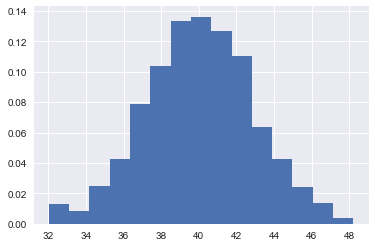

In [6]:
plt.hist(plants['0'],label='plant height',normed=True,bins=15)

(array([ 0.01080784,  0.01235181,  0.00771988,  0.01389579,  0.03242351,
         0.04323134,  0.05095122,  0.08028678,  0.10344642,  0.09727052,
         0.1374139 ,  0.13278197,  0.11425426,  0.17910127,  0.09727052,
         0.131238  ,  0.08028678,  0.06021508,  0.05712713,  0.03242351,
         0.02933555,  0.01698374,  0.01080784,  0.00771988,  0.00463193]),
 array([ 32.02256694,  32.67024521,  33.31792349,  33.96560176,
         34.61328003,  35.2609583 ,  35.90863658,  36.55631485,
         37.20399312,  37.85167139,  38.49934966,  39.14702794,
         39.79470621,  40.44238448,  41.09006275,  41.73774103,
         42.3854193 ,  43.03309757,  43.68077584,  44.32845412,
         44.97613239,  45.62381066,  46.27148893,  46.9191672 ,
         47.56684548,  48.21452375]),
 <a list of 25 Patch objects>)

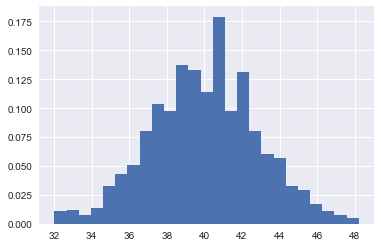

In [7]:
plt.hist(plants['0'],label='plant height',normed=True,bins=25)

(array([ 0.00864627,  0.0129694 ,  0.0129694 ,  0.00432313,  0.01513097,
         0.01729254,  0.03674664,  0.04971604,  0.03458507,  0.06268544,
         0.08646268,  0.07997798,  0.11240149,  0.09943208,  0.13617872,
         0.12969402,  0.12969402,  0.12320932,  0.16427909,  0.14482499,
         0.09727052,  0.13185559,  0.09943208,  0.07997798,  0.05620074,
         0.05836231,  0.04323134,  0.03674664,  0.0259388 ,  0.02810037,
         0.0129694 ,  0.00864627,  0.0129694 ,  0.00216157,  0.0064847 ]),
 array([ 32.02256694,  32.48519428,  32.94782162,  33.41044895,
         33.87307629,  34.33570363,  34.79833097,  35.2609583 ,
         35.72358564,  36.18621298,  36.64884032,  37.11146765,
         37.57409499,  38.03672233,  38.49934966,  38.961977  ,
         39.42460434,  39.88723168,  40.34985901,  40.81248635,
         41.27511369,  41.73774103,  42.20036836,  42.6629957 ,
         43.12562304,  43.58825038,  44.05087771,  44.51350505,
         44.97613239,  45.43875972,  45

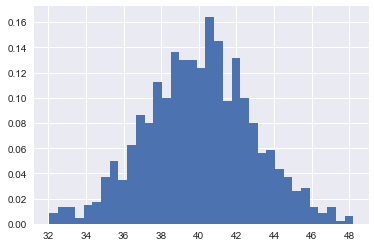

In [8]:
plt.hist(plants['0'],label='plant height',normed=True,bins=35)

- It seems like 25 is a good number of bins because this lets your see the spike around 41 inches

3) What distribution would you consider fitting to the empirical data?

<br>
<details><summary>
Click here for a hint…
</summary>
- Think about if the data is discrete or continuous <br>
- Think about what the data describes
</details>

In [9]:
# I would consider fitting a normal distribution to this data

4) Write down the equation that would model the random variable in question with the distribution you have chosen

For example:
- $\text{Let X be the number of heads in 5 coin flips}$
- $X \sim Binomial(n, p)$


- Let X be the height of a given plant from the sample
- $X \sim  Normal(40cm, 3cm)$

5) Write down the likelihood function to calculate the likelihood of a given parameter value:

Write it Latex or write the formula, take a picture, and embed the picture

<br>
<details><summary>
Click here for a hint…
</summary>
- This will be based on the distribution you have chosen above <br>
- A **parameter** of the binomial distribution will be `n` or `p` for example <br>
- The likelihood function would be the product of the probabilities for each data point 

</details>

$L(\theta_1,\theta_2)=\prod\limits_{i=1}^n f(x_i;\theta_1,\theta_2)=\theta^{-n/2}_2(2\pi)^{-n/2}\text{exp}\left[-\dfrac{1}{2\theta_2}\sum\limits_{i=1}^n(x_i-\theta_1)^2\right]$

- find the likelihood with respect to $\theta_1=\mu$ =$\hat{\theta}_1=\hat{\mu}=\dfrac{\sum x_i}{n}=\bar{x}$
    - To find the likelihood, take the derivative of the Likelihood funcwith wrt. $\theta_1$ and set equal to zero

- Next, find the likelihood function wrt to $\hat{\theta}_2=\hat{\sigma}^2=\dfrac{\sum(x_i-\bar{x})^2}{n}$

6) Write a python function that will calculate the __likelihood__ of a parameter given the data

- The function will take a parameter and the data as arguments
- Use `scipy.stats` and `numpy.product()`

<br>

<details><summary>
Click here for a hint…
</summary>
Look at the returned values. Is there some thing strange about them?
</details>

In [10]:
import scipy.stats as stats
import numpy as np

In [11]:
for k,v in plants.iterrows():
    print(v[0])
    break

38.9085248663


In [16]:
def normal_likelihood(data,mean,sigma=3):
    # return the likelihood of a parameter given the data
    for m in mean:
        print(f'likelihood of {m} is {np.product([stats.norm(m,sigma).pdf(d[0]) for k,d in data.iterrows()])}')

In [17]:
normal_likelihood(plants,[40,32])

likelihood of 40 is 0.0
likelihood of 32 is 0.0


7) Write a python function that will calculate the __log-likelihood__ of a parameter given the data

- The function will take a parameter and the data as arguments
- Use `scipy.stats` and switch to `sum`

In [23]:
def normal_likelihood_log(data,mean,sigma=3):
    # return the log likelihood from a list of parameters given the data
    params_log_likelihood = []
    for m in mean:
        log_likelihood = np.sum([np.log(stats.norm(m,sigma).pdf(d[0])) for k,d in data.iterrows()])
        print(f"log-likelihood of {m} is {log_likelihood }")
        
        params_log_likelihood.append((m,log_likelihood ))
    return params_log_likelihood

In [24]:
normal_likelihood_log(plants,[40,32])

log-likelihood of 40 is -2475.773054748312
log-likelihood of 32 is -6046.625357685913


[(40, -2475.773054748312), (32, -6046.6253576859126)]

8) Define a range of possible values for the parameter (from 32 to 42) (using `numpy.linspace`).

Calculate the likelihood for each of the values defined in the range.

Plot the values ($x$) against the likelihood ($L(\theta)$) 

In [22]:
possible_means = np.linspace(32,42,30)



In [26]:
results = normal_likelihood_log(plants,possible_means)

log-likelihood of 32.0 is -6046.625357685913
log-likelihood of 32.3448275862069 is -5746.0584976207265
log-likelihood of 32.689655172413794 is -5458.703422467682
log-likelihood of 33.03448275862069 is -5184.5601322267785
log-likelihood of 33.37931034482759 is -4923.6286268980175
log-likelihood of 33.724137931034484 is -4675.908906481398
log-likelihood of 34.06896551724138 is -4441.40097097692
log-likelihood of 34.41379310344828 is -4220.104820384584
log-likelihood of 34.758620689655174 is -4012.0204547043895
log-likelihood of 35.10344827586207 is -3817.1478739363365
log-likelihood of 35.44827586206897 is -3635.487078080426
log-likelihood of 35.793103448275865 is -3467.0380671366556
log-likelihood of 36.13793103448276 is -3311.8008411050278
log-likelihood of 36.48275862068966 is -3169.7753999855413
log-likelihood of 36.827586206896555 is -3040.9617437781967
log-likelihood of 37.172413793103445 is -2925.3598724829963
log-likelihood of 37.51724137931035 is -2822.969786099932
log-likelihoo

In [37]:
print(*zip(*results))

(32.0, 32.344827586206897, 32.689655172413794, 33.03448275862069, 33.379310344827587, 33.724137931034484, 34.068965517241381, 34.413793103448278, 34.758620689655174, 35.103448275862071, 35.448275862068968, 35.793103448275865, 36.137931034482762, 36.482758620689658, 36.827586206896555, 37.172413793103445, 37.517241379310349, 37.862068965517238, 38.206896551724142, 38.551724137931032, 38.896551724137929, 39.241379310344826, 39.586206896551722, 39.931034482758619, 40.275862068965516, 40.620689655172413, 40.96551724137931, 41.310344827586206, 41.655172413793103, 42.0) (-6046.6253576859126, -5746.0584976207265, -5458.7034224676818, -5184.5601322267785, -4923.6286268980175, -4675.9089064813979, -4441.4009709769198, -4220.1048203845839, -4012.0204547043895, -3817.1478739363365, -3635.4870780804258, -3467.0380671366556, -3311.8008411050278, -3169.7753999855413, -3040.9617437781967, -2925.3598724829963, -2822.9697860999322, -2733.7914846290146, -2657.8249680702347, -2595.0702364235995, -2545.52

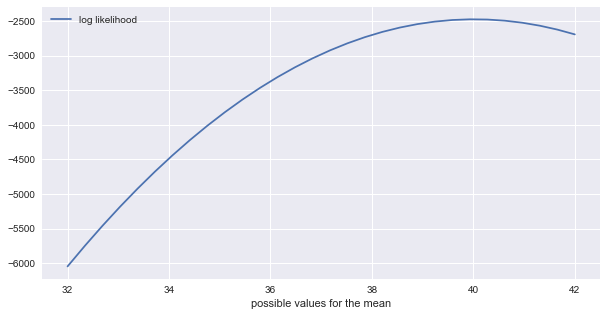

In [36]:
plt.figure(figsize=(10,5))
plt.plot(*zip(*results),label='log likelihood')
plt.xlabel('possible values for the mean')
plt.legend()

9) Find the maximum likelihood estimate for the parameter of interest

<br>
<details><summary>
Click here for a hint…
</summary>
use `numpy.argmax`
</details>

In [38]:
from operator import itemgetter

In [ ]:
itemgetter()

In [41]:
arg_max  = np.argmax([i[1] for i in results])

In [42]:
print(f'The MLE for the mean is {results[arg_max][0]}')

The MLE for the mean is 39.93103448275862


10) What does this estimate mean? In general? For this data?

- This estimates means that the most likely mean of this data (height of a plant) is 39.9cm

11) Create a plot the empirical data and the estimated model:

In [47]:
estimated_model = stats.norm(39.9,3)

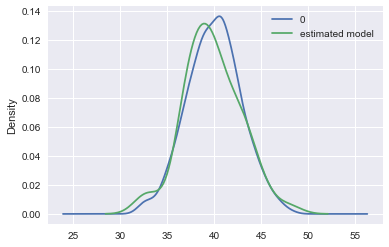

In [71]:

plants.plot(kind='kde',label='original data')
sns.kdeplot(estimated_model.rvs(100),label='estimated model')

In [88]:
empirical_model_params = stats.norm.fit(plants)
empirical_model = stats.norm(*empirical_model_params)

### Challenge Activity


Find the K-L Divergence between the empirical data and the estimated model:

In [86]:
from math import log2

In [103]:
def kl_divergence(p,q):
    #https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians
    return log2(q['std']/p['std']) + (p['std']**2 + (p['mean'] - q['mean'])**2)/(2*q['std']**2) -1/2

In [138]:
from math import sqrt, pi, e

In [155]:
estimated_model.mean()

39.899999999999999

In [156]:
estimated_model.var()

9.0

In [157]:
var = 2.87**2
u = 40
var_fit = 9.0
u_fit = 39.9

In [158]:
norm_pdf_original = lambda r : (1/sqrt(2*pi*var))*e**(-(r-u)**2/(2*var))
norm_pdf_fitted = lambda r : (1/sqrt(2*pi*var_fit))*e**(-(r-u_fit)**2/(2*var_fit))


In [159]:
integrate.quad(norm_pdf_original,31,49)

(0.9982866567092143, 1.1083208427355076e-14)

In [160]:
integrate.quad(norm_pdf_fitted,31,49)

(0.9972854229012696, 1.1072092390471784e-14)

In [163]:
(0.9982866567092143*log2(0.9982866567092143/0.9972854229012696)) +\
    (1.1083208427355076e-14*log2(1.1083208427355076e-14/1.1072092390471784e-14))

0.0014451999039167321

In [112]:
p={'mean':40.0,'std':2.87}
q={'mean':39.9, 'std':3.0}

In [113]:
kl_divergence(p,q)

0.022072874931304276

-----
Part II: Estimating Distrubtions
-----

__1)__ Let $X_1, \dots, X_n$ be i.i.d. with PDF  

$$ f(x | \theta) = \theta x^{\theta - 1} \text{, } 0 \leq x \leq 1 \text{, } 0 < \theta < \infty $$

Find the MLE of $\theta$.

In [82]:
# Find the likelihood function = Product of F(X|theta)
# Take the log of the likelihood function = log(theta) + (theta-1)log(x)
# Take the derivative of the likelihood function wrt to theta. 0 = n/theta + log(SUM(x))
# Solve for theta = -log(SUM(x)) = n/theta  => - n/SUM(log(Xi)) = theta


__3)__

Let $X_1, \dots, X_n$ be a random sample from a population with PMF

$$ P(X = x) = \theta^x (1 - \theta)^{1 - x} \text{, } x = 0 \text{ or } 1 \text{, } 0 \leq \theta \leq \frac{1}{2} $$  

a) Find the MLE of $\theta$.  

In [83]:
# Find the likelihood function = Product of P(X=x)
# Take the log of the likelihood function = nx*log(theta) + log(1-theta)*SUM(1-Xi)
# Take the derivative of the likelihood function wrt. theta and set to zero
# 0 = SUM(Xi)/theta - (n-Xi)/(1-theta)
# theta = 1/n*SUM(Xi)

b) Does the MLE estimator seem reasonable? Justify your choice.

In [ ]:
# Yes, the MLE estimator seems reasonable . the MLE estimator is the sample mean of the distribution.
# For a binomial distribution, this seems reasonable as the mean

----
Challenge Exercises
----


Kampala is an Ugandan city:
![](http://www.operationworld.org/files/ow/maps/lgmap/ugan-MMAP-md.png)

It experiences frequent power outages:
![](https://upload.wikimedia.org/wikipedia/commons/9/90/UMEME-Outages-Kampala-Kibuli.png)

The file `outage.csv` contains the number of power outages Kampala (Ugandan city) experiences each month for the past 72 months.

1) Read in the `../data/outage.csv`

In [115]:
kampala = pd.read_csv('../data/outage.csv')

In [120]:
kampala.describe()

,0
count,72.000000
mean,19.236111
std,4.015789
min,11.000000
25%,16.000000
50%,19.000000
75%,21.000000
max,30.000000


2) Plot the data on a histogram and set `normed=True` to get the probability density histogram.

Explore bins size. What is a useful number of bins?

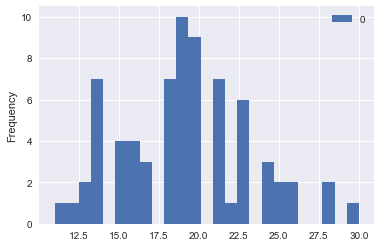

In [119]:
kampala.plot(kind='hist',bins=25)

3)  What distribution would you consider fitting the data to given the nature of the data ?

- Think about if the data is discrete or continuous 
- Think about what the data describes

In [121]:
# I would consider fitting a poisson distribution (for the number of outages)

4) Write down the equation that would model the random variable in question with the distribution you have chosen

$\!f(k;\lambda )={\frac {\lambda ^{k}e^{-\lambda }}{k!}} where \lambda =19  $

5) Write down the likelihood function to calculate the likelihood of a given parameter value 

<br>

<details><summary>
Click here for the solution…
</summary>
$$\mathcal{L}(\lambda) = \prod_{i=0}^n \frac{{e^{ - \lambda } \lambda ^{x_i} }}{{x_i!}}$$
</details>

$\begin{align} L(\lambda;x) &= \prod\limits_{i=1}^n \dfrac{\lambda^{x_i}e^{-\lambda}}{x_i!}\\ &= \dfrac{\lambda^{\sum\limits^n_{i=1}x_i} e^{-n\lambda}}{x_1!x_2! \cdots x_n!}\\ \end{align}$

6) Write a python function that will calculate the likelihood of a parameter given the data

- The function will take a parameter and the data as arguments
- Use `scipy.stats` and `numpy.product()`

7) Define a range of possible values for the parameter from `14` to `21` (using `numpy.linspace`).

Calculate the likelihood for each of the values defined in the range.

Plot the values ($x$) against the likelihood ($L(\theta)$) 

In [125]:
def poisson_likelihood_log(data,mean,sigma=3):
    # return the log likelihood from a list of parameters given the data
    params_log_likelihood = []
    for m in mean:
        log_likelihood = np.sum([np.log(stats.poisson(m).pmf(d[0])) for k,d in data.iterrows()])
        print(f"log-likelihood of {m} is {log_likelihood }")
        
        params_log_likelihood.append((m,log_likelihood ))
    return params_log_likelihood

8) Write a function to calculate the log-likelihood.

In [133]:
results_poisson = poisson_likelihood_log(kampala,np.linspace(14,21))

log-likelihood of 14.0 is -264.9199814281802
log-likelihood of 14.142857142857142 is -261.144661236229
log-likelihood of 14.285714285714286 is -257.5106603648443
log-likelihood of 14.428571428571429 is -254.01516641892047
log-likelihood of 14.571428571428571 is -250.6554501310638
log-likelihood of 14.714285714285714 is -247.428862117448
log-likelihood of 14.857142857142858 is -244.33282979040646
log-likelihood of 15.0 is -241.36485441875212
log-likelihood of 15.142857142857142 is -238.5225083274232
log-likelihood of 15.285714285714285 is -235.80343222861063
log-likelihood of 15.428571428571429 is -233.20533267702055
log-likelihood of 15.571428571428571 is -230.7259796424151
log-likelihood of 15.714285714285714 is -228.36320419299727
log-likelihood of 15.857142857142858 is -226.11489628362492
log-likelihood of 16.0 is -223.97900264321618
log-likelihood of 16.142857142857142 is -221.9535247560445
log-likelihood of 16.285714285714285 is -220.03651693197426
log-likelihood of 16.42857142857

9) Find the maximum likelihood estimate for the parameter of interest

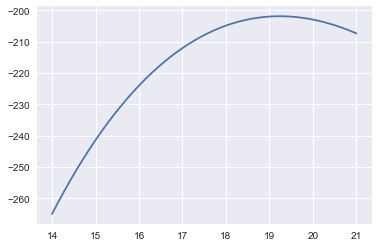

In [134]:
plt.plot(*zip(*results_poisson))

10) What does this estimate mean? In general? For this data?

<br>
<br> 
<br>

----